# VIX S&P500 Volatility

In this notebook, we'll take a look at the VIX S&P500 Volatility dataset, available on the [Quantopian Store](https://www.quantopian.com/store). This dataset spans 02 Jan 2004 through the current day. This data has a daily frequency. Calculated by the CBOE, Quantopian sources this data from Quandl. Quandl has multiple data sets for VIX. Quantopian hosts two of them: this one, sourced by Quandl directly from the CBOE. A second is delivered to Quandl through Yahoo.
## Notebook Contents

There are two ways to access the data and you'll find both of them listed below. Just click on the section you'd like to read through.

- <a href='#interactive'><strong>Interactive overview</strong></a>: This is only available on Research and uses blaze to give you access to large amounts of data. Recommended for exploration and plotting.
- <a href='#pipeline'><strong>Pipeline overview</strong></a>: Data is made available through pipeline which is available on both the Research & Backtesting environment. Recommended for custom factor development and moving back & forth between research/backtesting.

### Free samples and limits
One key caveat: we limit the number of results returned from any given expression to 10,000 to protect against runaway memory usage. To be clear, you have access to all the data server side. We are limiting the size of the responses back from Blaze.

There is a *free* version of this dataset as well as a paid one. The free sample includes data until 2 months prior to the current date.

To access the most up-to-date values for this data set for trading a live algorithm (as with other partner sets), you need to purchase acess to the full set.

With preamble in place, let's get started:

<a id='interactive'></a>
#Interactive Overview
### Accessing the data with Blaze and Interactive on Research
Partner datasets are available on Quantopian Research through an API service known as [Blaze](http://blaze.pydata.org). Blaze provides the Quantopian user with a convenient interface to access very large datasets, in an interactive, generic manner.

Blaze provides an important function for accessing these datasets. Some of these sets are many millions of records. Bringing that data directly into Quantopian Research directly just is not viable. So Blaze allows us to provide a simple querying interface and shift the burden over to the server side.

It is common to use Blaze to reduce your dataset in size, convert it over to Pandas and then to use Pandas for further computation, manipulation and visualization.

Helpful links:
* [Query building for Blaze](http://blaze.readthedocs.io/en/latest/queries.html)
* [Pandas-to-Blaze dictionary](http://blaze.readthedocs.io/en/latest/rosetta-pandas.html)
* [SQL-to-Blaze dictionary](http://blaze.readthedocs.io/en/latest/rosetta-sql.html).


Once you've limited the size of your Blaze object, you can convert it to a Pandas DataFrames using:
> `from odo import odo`  
> `odo(expr, pandas.DataFrame)`


###To see how this data can be used in your algorithm, search for the `Pipeline Overview` section of this notebook or head straight to <a href='#pipeline'>Pipeline Overview</a>

In [3]:
# For use in Quantopian Research, exploring interactively
from quantopian.interactive.data.quandl import cboe_vix as dataset
from quantopian.interactive.data.quandl import cboe_vxv as vxv_dataset

# import data operations
from odo import odo
# import other libraries we will use
import pandas as pd

In [4]:
# Let's use blaze to understand the data a bit using Blaze dshape()
dataset.dshape

dshape("""var * {
  vix_open: float64,
  vix_high: float64,
  vix_low: float64,
  vix_close: float64,
  asof_date: datetime,
  timestamp: datetime
  }""")

In [5]:
# And how many rows are there?
# N.B. we're using a Blaze function to do this, not len()
# VIX Dataset
dataset.count()

3162

In [6]:
# VXV Dataset
vxv_dataset.count()
merged_dataset = vxv_dataset.merge(dataset, left_on="asof_date", right_on="asof_date", how="inner")

AttributeError: 'Field' object has no attribute 'merge'

In [7]:
# Let's see what the VIX data looks like. We'll grab the first three rows.
dataset[:3]

,vix_open,vix_high,vix_low,vix_close,asof_date,timestamp
0,19.75,21.16,19.54,20.98,2016-02-23,2016-02-24 12:00:31.122419
1,22.28,22.87,20.26,20.72,2016-02-24,2016-02-25 12:00:42.496514
2,20.54,21.26,19.10,19.11,2016-02-25,2016-02-26 12:00:38.135758


In [8]:
# Let's see what the VXV data looks like, grab the first three rows of the VXV.
vxv_dataset[:3]

,open_,high,low,close,asof_date,timestamp
0,21.82,22.75,21.47,22.44,2016-02-23,2016-02-24 12:01:25.608342
1,23.62,24.07,22.07,22.34,2016-02-24,2016-02-25 12:03:16.851758
2,22.19,22.69,20.63,21.24,2016-02-25,2016-02-26 12:01:06.410442


In [18]:
vxv_dataset

,open_,high,low,close,asof_date,timestamp
0,21.82,22.75,21.47,22.44,2016-02-23,2016-02-24 12:01:25.608342
1,23.62,24.07,22.07,22.34,2016-02-24,2016-02-25 12:03:16.851758
2,22.19,22.69,20.63,21.24,2016-02-25,2016-02-26 12:01:06.410442
3,20.99,22.00,20.66,21.86,2016-02-26,2016-02-29 12:03:16.033453
4,22.08,22.51,21.38,22.39,2016-02-29,2016-03-01 12:02:04.332504
5,21.80,22.08,20.28,20.28,2016-03-01,2016-03-02 12:01:33.444729
6,20.58,20.84,19.81,19.92,2016-03-02,2016-03-03 12:00:46.495857
7,20.09,20.36,19.34,19.49,2016-03-03,2016-03-04 12:03:12.683389
8,19.25,19.87,18.84,19.63,2016-03-04,2016-03-07 12:00:33.326770
9,20.27,20.40,19.34,19.90,2016-03-07,2016-03-08 12:01:11.449548


Let's go over the columns:
- **vix_open**: opening price for the day indicated on asof_date
- **vix_high**: high price for the day indicated on asof_date
- **vix_low**: lowest price for the day indicated by asof_date
- **vix_close**: closing price for asof_date
- **asof_date**: the timeframe to which this data applies
- **timestamp**: this is our timestamp on when we registered the data.

We've done much of the data processing for you. Fields like `timestamp` are standardized across all our Store Datasets, so the datasets are easy to combine.

We can select columns and rows with ease. Below, we'll do a simple plot.

In [77]:
# Plotting this DataFrame since 2007
import math

df = odo(dataset, pd.DataFrame)
df.head(5)

df2 = odo(vxv_dataset, pd.DataFrame)
df2.head(5)

combined = df2.merge(df, left_on="asof_date", right_on="asof_date", how="outer")
combined = combined.set_index(['asof_date'])
combined.head(5)

def f(x):
    return x['vix_open'] / x['open_']

combined['ivts'] = combined.apply(f, axis=1)

#i = 0
def row_index(x):
    return combined.index.get_loc(x.index)
    #return i

combined=combined.sort_index(ascending=False)    

#combined['row_index'] = combined.apply(row_index, axis=1)
combined['row_index'] = range(1, len(combined) + 1)

def forward_vix(x):
    forward_index = x['row_index'] - 31
    if forward_index < 0:
        return float('NaN')
    else:
        return math.log(combined.ix[forward_index]['vix_open']) - math.log(x['vix_open'])
    #return i

#remove nulls
combined['forward_vix'] = combined.apply(forward_vix, axis=1)

combined= combined[pd.notnull(combined['ivts'])]
combined= combined[pd.notnull(combined['forward_vix'])]
combined1=combined.head(1300)
combined1

,open_,high,low,close,timestamp_x,vix_open,vix_high,vix_low,vix_close,timestamp_y,ivts,row_index,forward_vix
asof_date,,,,,,,,,,,,,
2016-06-10,18.19,19.10,18.15,18.94,2016-06-13 11:05:52.504709,14.89,17.33,14.85,17.03,2016-06-13 11:01:29.028075,0.818582,31,-0.163823
2016-06-09,17.15,17.40,17.12,17.32,2016-06-10 11:04:39.552787,14.01,14.85,13.99,14.64,2016-06-10 11:01:23.962223,0.816910,32,-0.090326
2016-06-08,16.51,16.90,16.39,16.79,2016-06-09 12:02:45.258797,13.84,14.27,13.70,14.08,2016-06-09 12:03:47.769789,0.838280,33,-0.159463
2016-06-07,16.34,16.63,16.20,16.63,2016-06-08 11:02:10.924458,12.77,14.05,12.72,14.05,2016-06-08 11:06:57.038918,0.781518,34,-0.067205
2016-06-06,16.59,16.85,16.31,16.44,2016-06-07 11:07:00.970637,13.84,14.27,13.42,13.65,2016-06-07 11:04:33.545366,0.834237,35,-0.099437
2016-06-03,16.56,17.31,16.34,16.49,2016-06-06 11:05:36.701700,13.78,14.66,12.90,13.47,2016-06-06 11:05:57.076790,0.832126,36,-0.077687
2016-06-02,16.86,17.06,16.37,16.37,2016-06-03 11:01:07.401924,14.42,14.92,13.62,13.63,2016-06-03 11:05:50.120987,0.855279,37,-0.094478
2016-06-01,17.17,17.37,16.68,16.70,2016-06-02 11:05:18.132202,14.45,15.25,14.18,14.20,2016-06-02 11:03:38.173640,0.841584,38,-0.144966
2016-05-31,16.52,17.28,16.39,16.63,2016-06-01 11:03:08.118597,13.94,15.00,13.45,14.19,2016-06-01 11:04:06.930718,0.843826,39,-0.045496


In [111]:
# So we can plot it, we'll set the index as the `asof_date`
df['asof_date'] = pd.to_datetime(df['asof_date'])
df = df.set_index(['asof_date'])
df.head(5)

,vix_open,vix_high,vix_low,vix_close,timestamp
asof_date,,,,,
2016-02-23,19.75,21.16,19.54,20.98,2016-02-24 12:00:31.122419
2016-02-24,22.28,22.87,20.26,20.72,2016-02-25 12:00:42.496514
2016-02-25,20.54,21.26,19.10,19.11,2016-02-26 12:00:38.135758
2016-02-26,18.89,20.13,18.46,19.81,2016-02-29 12:02:29.380139
2016-02-29,20.49,20.81,18.38,20.55,2016-03-01 12:01:48.633563


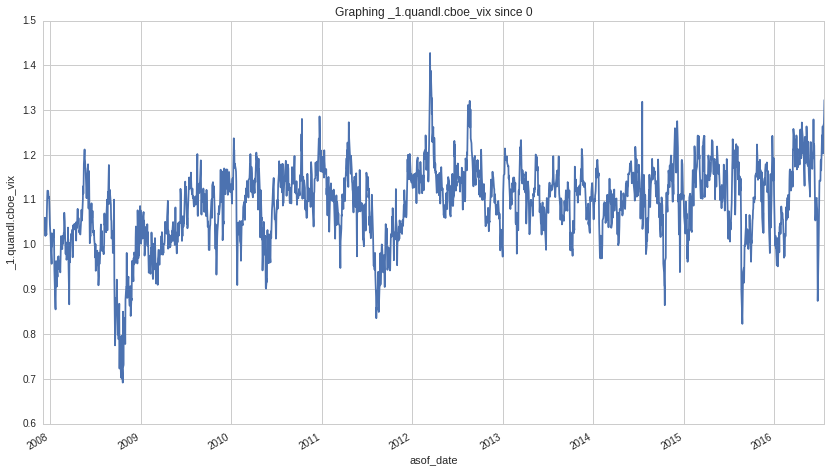

In [50]:
import matplotlib.pyplot as plt
combined.ivts.plot(label=str(dataset))
plt.ylabel(str(dataset))
plt.title("Graphing %s since %s" % (str(dataset), min(df.index)))

In [120]:
import statsmodels.api as sm
X = combined1[['open_', 'vix_open', 'ivts']]
y = combined1['forward_vix']

X = sm.add_constant(X)
est = sm.OLS(y, X).fit()
est.summary()

#print est.mse_resid
#print est.df_resid
#print est.fvalue
print est.mse_model

5.35472309572


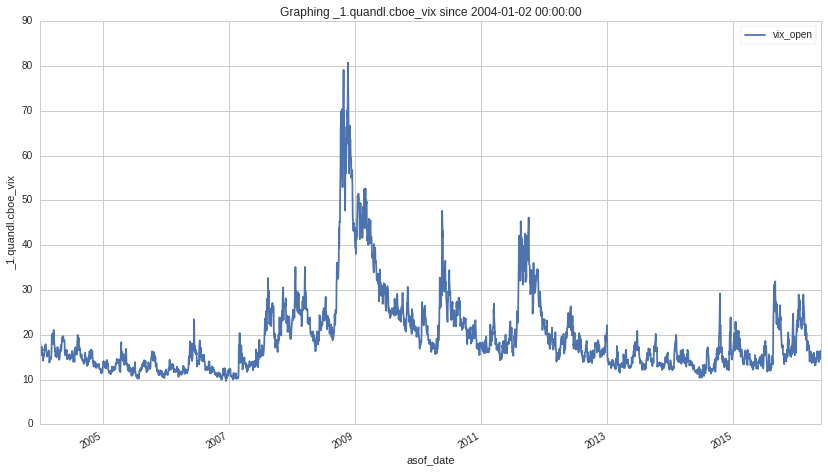

In [9]:
import matplotlib.pyplot as plt
df.vix_open.plot(label=str(dataset))
plt.ylabel(str(dataset))
plt.legend()
plt.title("Graphing %s since %s" % (str(dataset), min(df.index)))

mean squared error:0.0460031170358


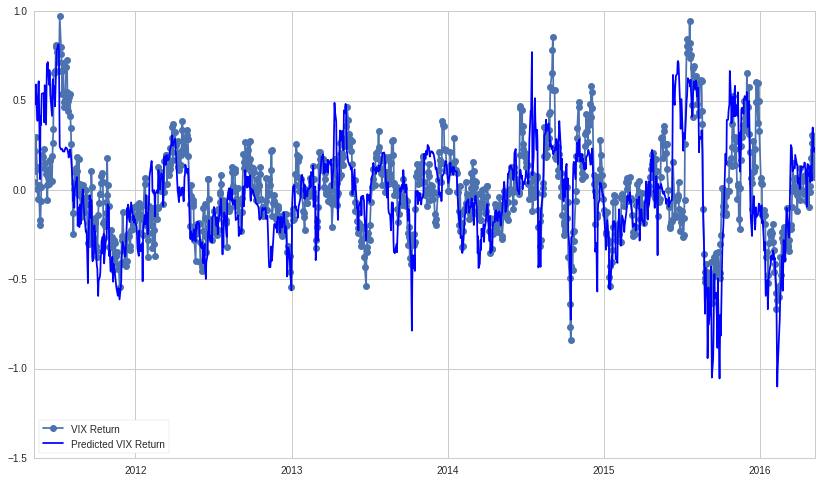

In [83]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

fig, ax = plt.subplots()

#i = 0
#fit_data: dataframe containing 21 days of VIX future to train
# training_data: dataframe containing 21 days of VIX future to predict
def out_of_sample_train(fit_data, training_data):
    X = fit_data[['open_', 'vix_open', 'ivts']]
    y = fit_data['forward_vix']
    X = sm.add_constant(X)
    #olsres = sm.OLS(y, X).fit()
    olsres = sm.OLS(y,X).fit_regularized() #ridge regression
    
    Xnew = training_data[['open_', 'vix_open', 'ivts']]
    Xnew = sm.add_constant(Xnew)
    ynewpred =  olsres.predict(Xnew)
    ytrue = training_data['forward_vix']
    
    date = training_data.index
    
    mse = mean_squared_error(ytrue.tolist(), ynewpred.tolist())
    return [date, ytrue, ynewpred, mse]

n_days = 21 
date = None
ytrue = None
ynewpred = None
range_n = 60
sum_se = 0

for i in range(range_n):
    fit_data_start = n_days * i + 1
    fit_data_end = n_days * (i + 1)
    
    training_data_start = n_days * (i + 1) + 1
    training_data_end = n_days * (i + 1) + n_days
    
    fit_data = combined1.iloc[fit_data_start:fit_data_end]
    training_data = combined1.iloc[training_data_start:training_data_end]
    
    result = out_of_sample_train(fit_data, training_data)
    date_i = result[0]
    ytrue_i = result[1]
    ynewpred_i = result[2]
    se_i = result[3] * n_days
    
    sum_se = sum_se + se_i
    
    if date is None:
        date = date_i
    else:
        date = date.append(date_i)
    
    if ytrue is None:
        ytrue = ytrue_i
    else:
        ytrue = ytrue.append(ytrue_i)
        
    if ynewpred is None:
        ynewpred = ynewpred_i
    else:
        ynewpred = np.append(ynewpred,ynewpred_i)

mse = sum_se / (range_n * n_days)
print "mean squared error:" + str(mse)
ax.plot(date, ytrue, 'o-', label="VIX Return")
ax.plot(date, ynewpred, 'b-', label="Predicted VIX Return")
ax.legend(loc="best")

<a id='pipeline'></a>

#Pipeline Overview

### Accessing the data in your algorithms & research
The only method for accessing partner data within algorithms running on Quantopian is via the pipeline API. Different data sets work differently but in the case of this data, you can add this data to your pipeline as follows:

Import the data set here
> `from quantopian.pipeline.data.quandl import cboe_vix`

Then in intialize() you could do something simple like adding the raw value of one of the fields to your pipeline:
> `pipe.add(cboe_vix.vix_open.latest, 'open_vix')`

Pipeline usage is very similar between the backtester and Research so let's go over how to import this data through pipeline and view its outputs.

In [10]:
# Import necessary Pipeline modules
from quantopian.pipeline import Pipeline
from quantopian.research import run_pipeline
from quantopian.pipeline.factors import AverageDollarVolume

In [11]:
# Import the datasets available
from quantopian.pipeline.data.quandl import cboe_vix

Now that we've imported the data, let's take a look at which fields are available for each dataset.

You'll find the dataset, the available fields, and the datatypes for each of those fields.

In [12]:
print "Here are the list of available fields per dataset:"
print "---------------------------------------------------\n"

def _print_fields(dataset):
    print "Dataset: %s\n" % dataset.__name__
    print "Fields:"
    for field in list(dataset.columns):
        print "%s - %s" % (field.name, field.dtype)
    print "\n"

_print_fields(cboe_vix)


print "---------------------------------------------------\n"

Here are the list of available fields per dataset:
---------------------------------------------------

Dataset: cboe_vix

Fields:
vix_open - float64
vix_low - float64
vix_high - float64
vix_close - float64


---------------------------------------------------



Now that we know what fields we have access to, let's see what this data looks like when we run it through Pipeline.


This is constructed the same way as you would in the backtester. For more information on using Pipeline in Research view this thread:
https://www.quantopian.com/posts/pipeline-in-research-build-test-and-visualize-your-factors-and-filters

In [13]:
pipe = Pipeline()
       
pipe.add(cboe_vix.vix_open.latest, 'open_vix')

In [16]:
# Setting some basic liquidity strings (just for good habit)
dollar_volume = AverageDollarVolume(window_length=20)
top_1000_most_liquid = dollar_volume.rank(ascending=False) < 1000

pipe.set_screen(top_1000_most_liquid & cboe_vix.vix_open.latest.notnan())

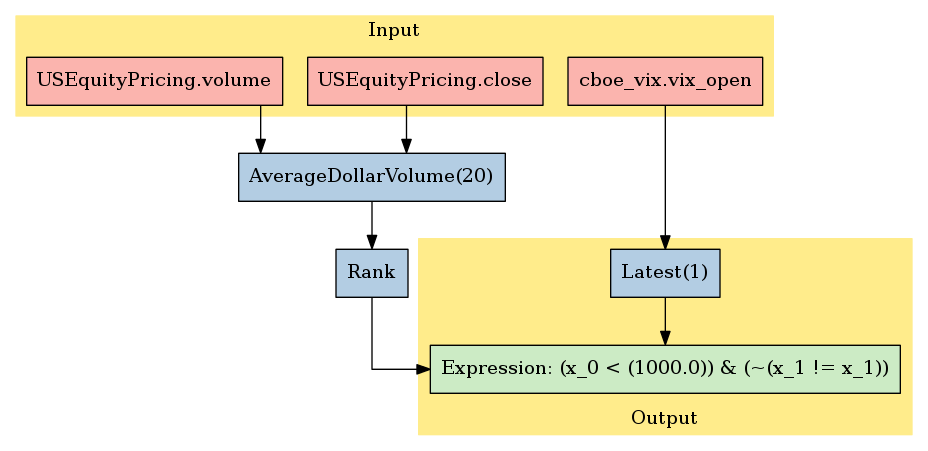

In [17]:
# The show_graph() method of pipeline objects produces a graph to show how it is being calculated.
pipe.show_graph(format='png')

In [ ]:
# run_pipeline will show the output of your pipeline
pipe_output = run_pipeline(pipe, start_date='2013-11-01', end_date='2013-11-25')
pipe_output

Here, you'll notice that each security is mapped to the corresponding value, so you could grab any security to get what you need.

Taking what we've seen from above, let's see how we'd move that into the backtester.

In [75]:
# This section is only importable in the backtester
from quantopian.algorithm import attach_pipeline, pipeline_output

# General pipeline imports
from quantopian.pipeline import Pipeline
from quantopian.pipeline.factors import AverageDollarVolume

# For use in your algorithms via the pipeline API
from quantopian.pipeline.data.quandl import cboe_vix

def make_pipeline():
    # Create our pipeline
    pipe = Pipeline()
    
    # Screen out penny stocks and low liquidity securities.
    dollar_volume = AverageDollarVolume(window_length=20)
    is_liquid = dollar_volume.rank(ascending=False) < 1000
    
    # Create the mask that we will use for our percentile methods.
    base_universe = (is_liquid)

    # Add the datasets available
    pipe.add(cboe_vix.vix_open.latest, 'vix_open')

    # Set our pipeline screens
    pipe.set_screen(is_liquid)
    return pipe

def initialize(context):
    attach_pipeline(make_pipeline(), "pipeline")
    
def before_trading_start(context, data):
    results = pipeline_output('pipeline')

Now you can take that and begin to use it as a building block for your algorithms, for more examples on how to do that you can visit our <a href='https://www.quantopian.com/posts/pipeline-factor-library-for-data'>data pipeline factor library</a>